# Exploring Numerical Data

## Settings

In [26]:
# Import relevant libraries
library(ggplot2)
library(dplyr)
library(gapminder)

options(scipen=999)

**Import the cars dataset**

In [2]:
# define the filename
filename <- "cars04.csv"

# load the CSV file from the local directory
cars <- read.csv(filename)

# preview the first 5 rows
head(cars)

name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
Chevrolet Aveo 4dr,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,11690,10965,1.6,4,103,28,34,2370,98,167,66
Chevrolet Aveo LS 4dr hatch,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,12585,11802,1.6,4,103,28,34,2348,98,153,66
Chevrolet Cavalier 2dr,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,14610,13697,2.2,4,140,26,37,2617,104,183,69
Chevrolet Cavalier 4dr,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,14810,13884,2.2,4,140,26,37,2676,104,183,68
Chevrolet Cavalier LS 2dr,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,16385,15357,2.2,4,140,26,37,2617,104,183,69
Dodge Neon SE 4dr,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,13670,12849,2.0,4,132,29,36,2581,105,174,67


In [3]:
# Learn data structure
str(cars)

'data.frame':	428 obs. of  19 variables:
 $ name       : Factor w/ 425 levels "Acura 3.5 RL 4dr",..: 66 67 68 69 70 114 115 133 129 130 ...
 $ sports_car : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ suv        : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ wagon      : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ minivan    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ pickup     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ all_wheel  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ rear_wheel : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ msrp       : int  11690 12585 14610 14810 16385 13670 15040 13270 13730 15460 ...
 $ dealer_cost: int  10965 11802 13697 13884 15357 12849 14086 12482 12906 14496 ...
 $ eng_size   : num  1.6 1.6 2.2 2.2 2.2 2 2 2 2 2 ...
 $ ncyl       : int  4 4 4 4 4 4 4 4 4 4 ...
 $ horsepwr   : int  103 103 140 140 140 132 132 130 110 130 ...
 $ city_mpg   : int  28 28 26 26 26 29 29 26 27 26 ...
 $ hwy_mpg    : int  34 34 37 37 37 

**Import the gapminder dataset**

In [21]:
# load the gap minder dataset
life <- gapminder

# Preview the data
head(life)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [17]:
# Learn data structure
str(life)

'data.frame':	1704 obs. of  6 variables:
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num  28.8 30.3 32 34 36.1 ...
 $ pop      : int  8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num  779 821 853 836 740 ...


# Graphical Exploration

### Graphical exploration of the cars dataset

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."

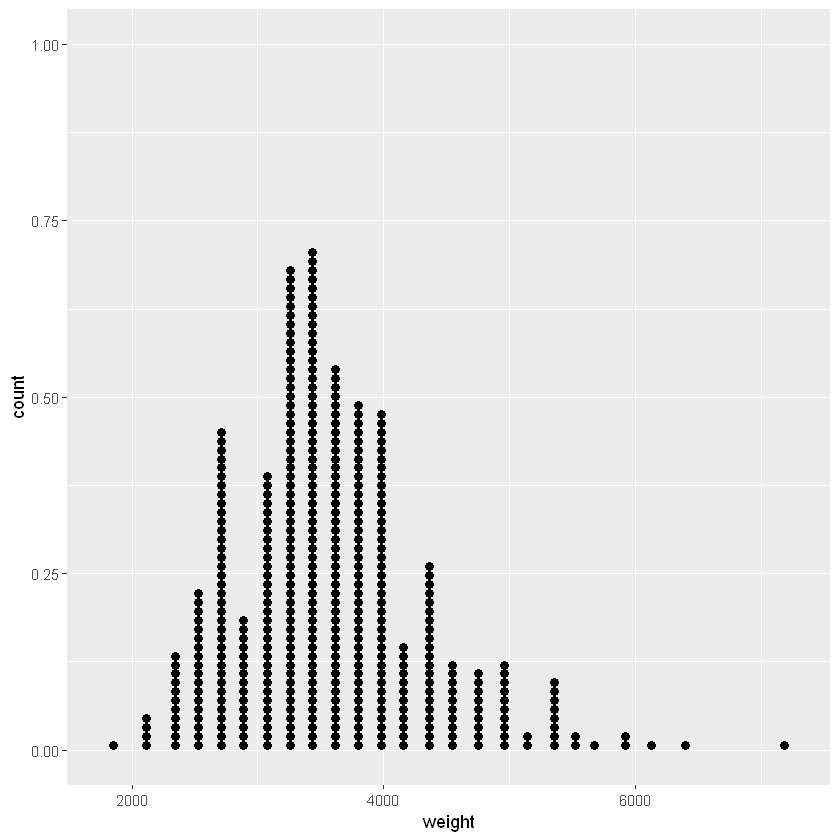

In [4]:
# Dotplot
ggplot(cars, aes(x = weight)) +
geom_dotplot(dotsize = 0.4)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

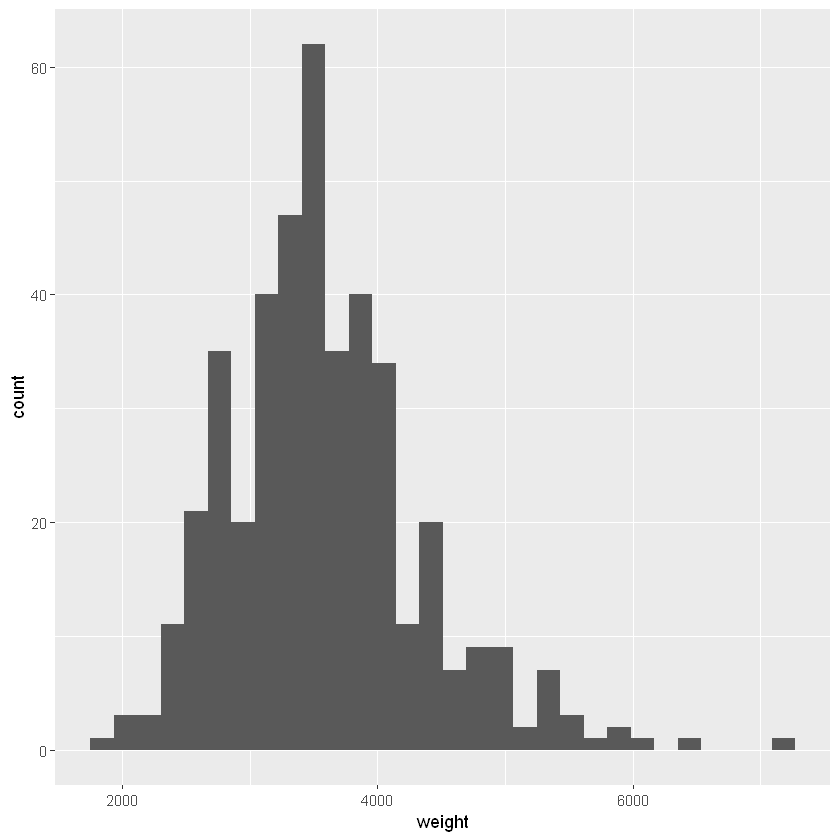

In [5]:
# Histogram
ggplot(cars, aes(x = weight)) +
geom_histogram()

Warning message:
"Removed 2 rows containing non-finite values (stat_density)."

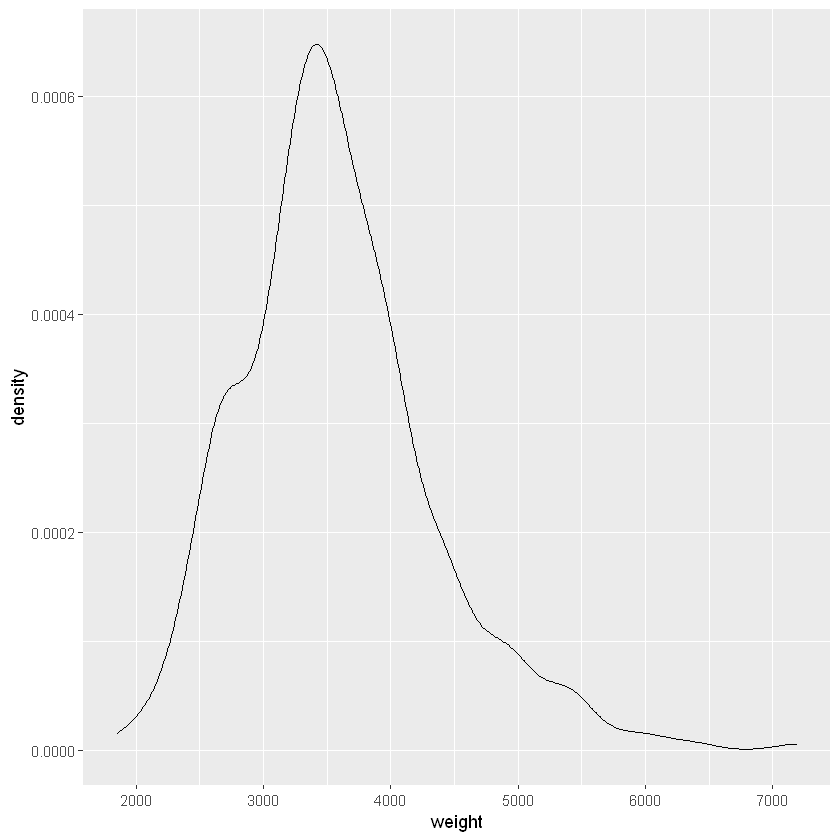

In [6]:
# Density plot
ggplot(cars, aes(x = weight)) +
geom_density()

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."

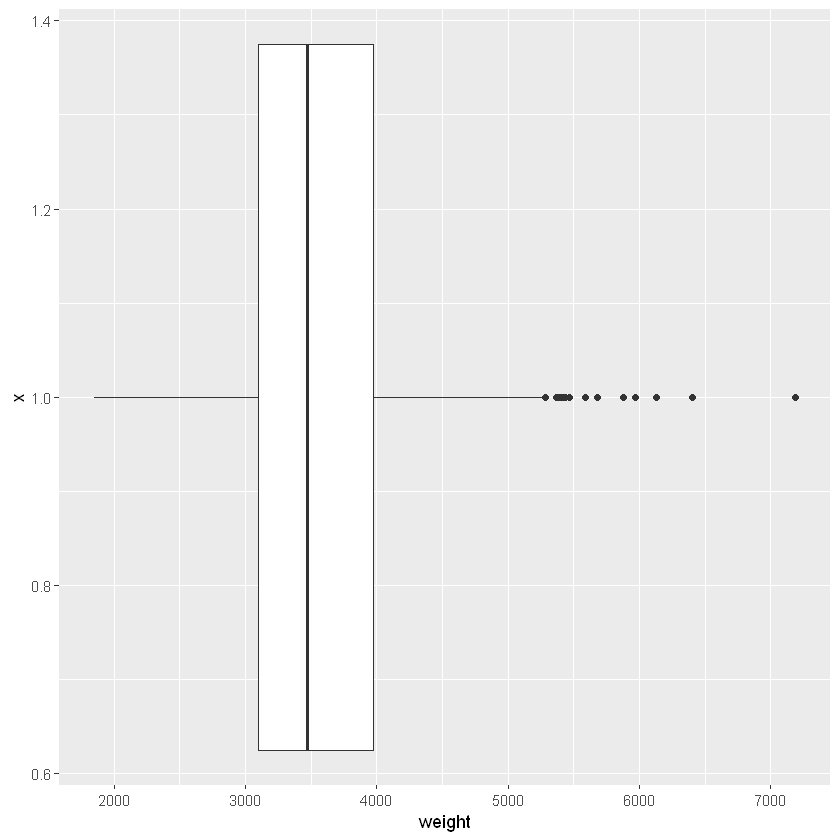

In [7]:
# Box plot
ggplot(cars, aes(x = 1, y = weight)) +
geom_boxplot() +
coord_flip()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."

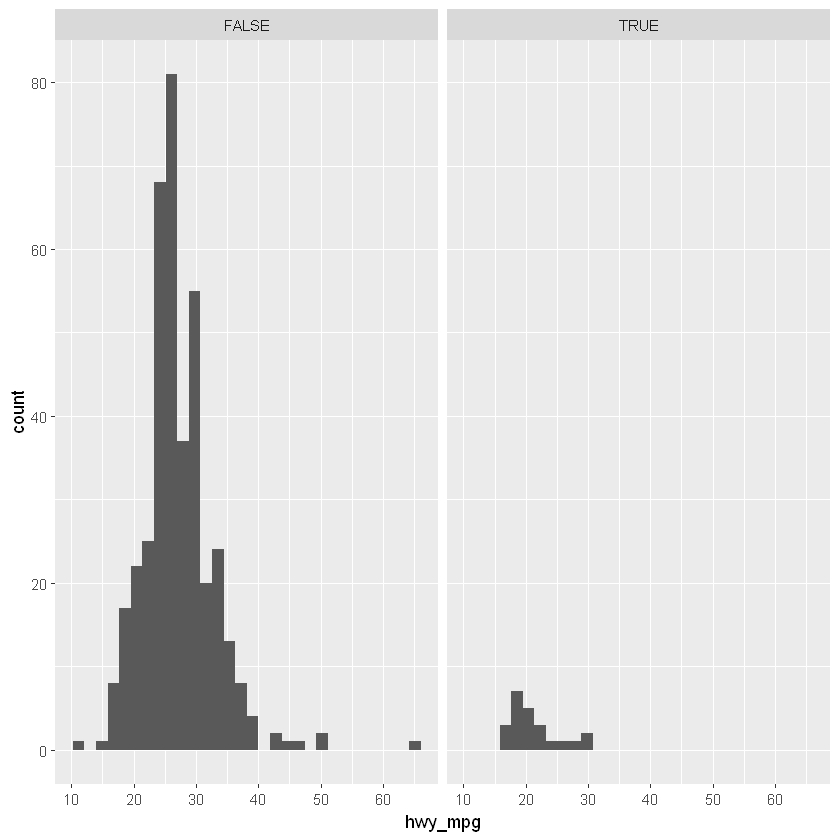

In [8]:
# Plot a histogram of hwy_mpg faceted by pickup, a logical variable indicating whether the car is an pickup or not.
ggplot(cars, aes(x = hwy_mpg)) +
geom_histogram() +
facet_wrap(~pickup)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."

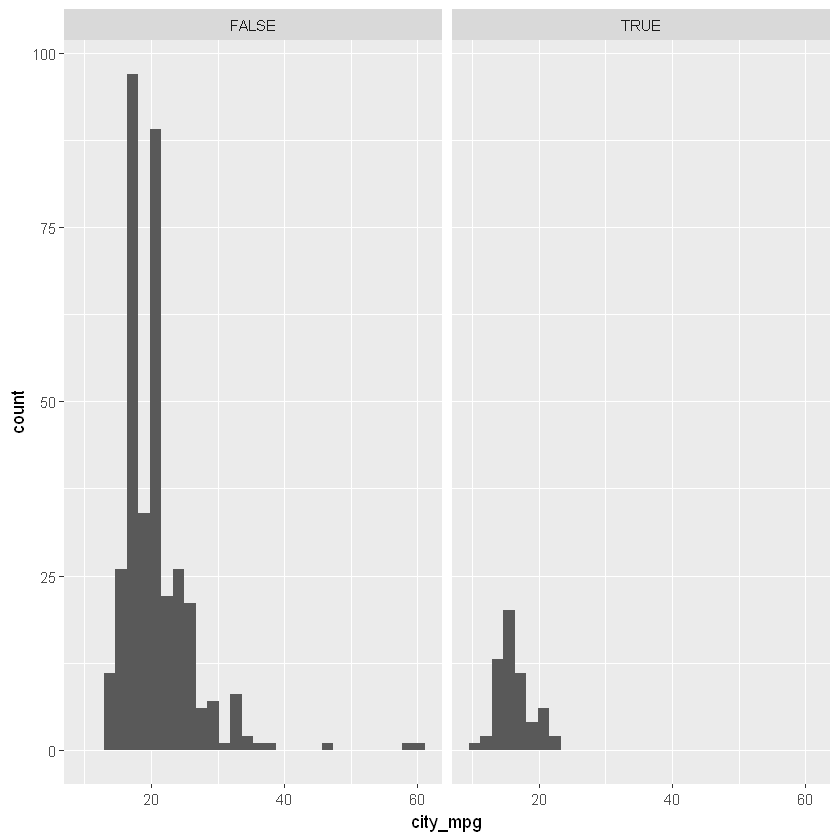

In [9]:
# Plot a histogram of city_mpg faceted by suv, a logical variable indicating whether the car is an SUV or not.
ggplot(cars, aes(x = city_mpg)) +
  geom_histogram() +
  facet_wrap(~ suv)

**Compare relationship between two variables using Boxplots and density plots**

Warning message:
"Removed 11 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 11 rows containing non-finite values (stat_density)."

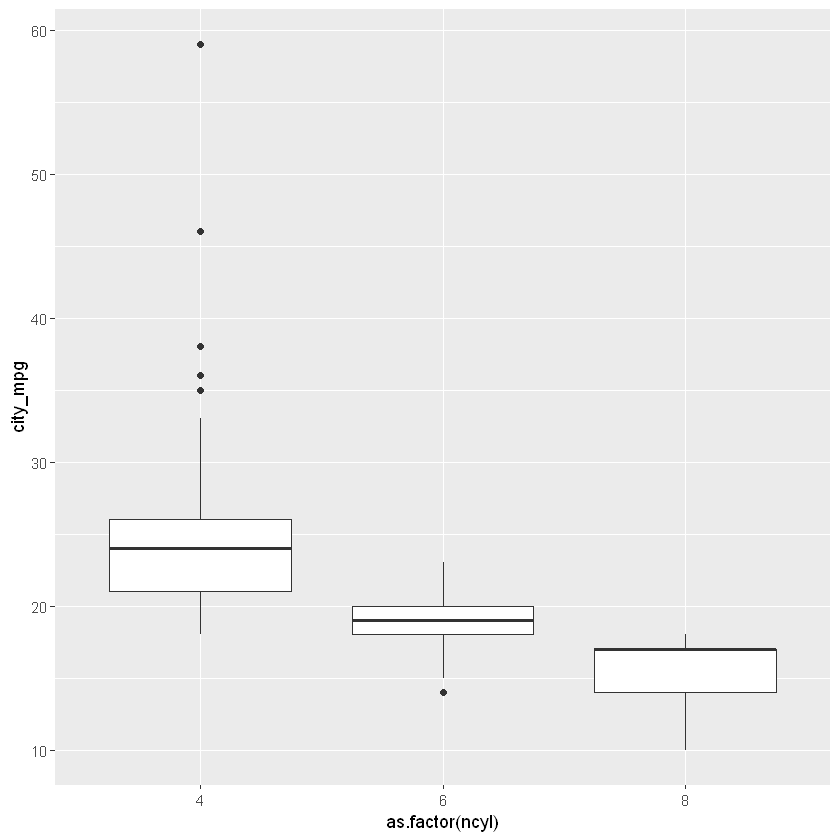

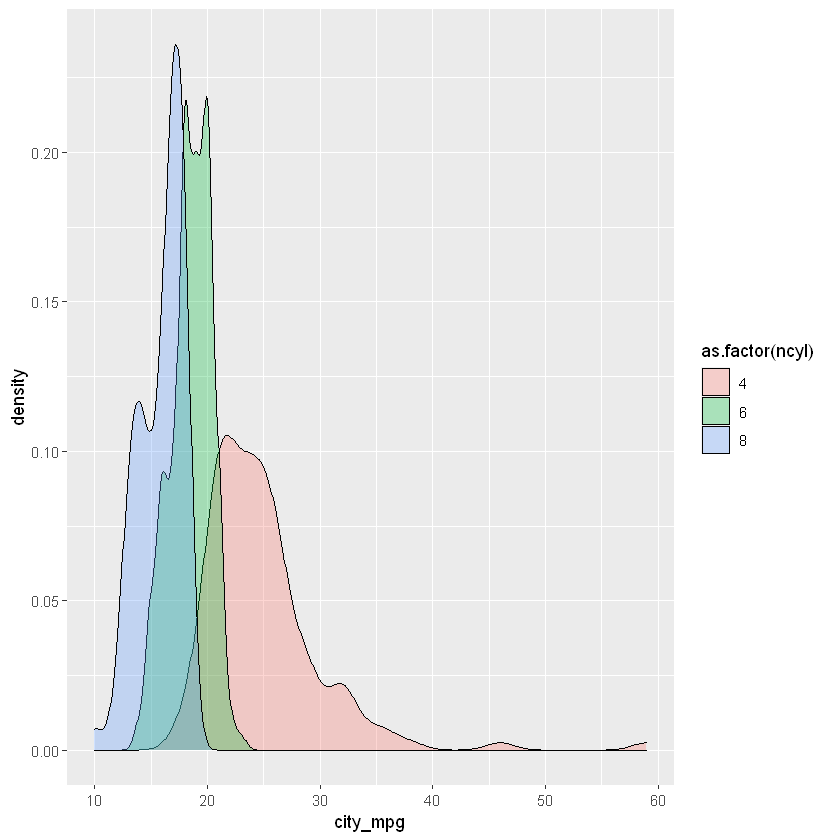

In [10]:
# Filter cars to include only cars with 4, 6, or 8 cylinders and save the result as common_cyl
common_cyl <- filter(cars, ncyl %in% c(4, 6, 8))

# Create box plots of city mpg by ncyl
ggplot(common_cyl, aes(x = as.factor(ncyl), y = city_mpg)) +
  geom_boxplot()

# Create overlaid density plots for same data
ggplot(common_cyl, aes(x = city_mpg, fill = as.factor(ncyl))) +
  geom_density(alpha = .3)

**Insights**
- The highest mileage cars have 4 cylinders.
- The typical 4 cylinder car gets better mileage than the typical 6 cylinder car, which gets better mileage than the typical 8 cylinder car.
- Most of the 4 cylinder cars get better mileage than even the most efficient 8 cylinder cars.

## Distribution of one Numeric variable

**Marginal distribution**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."

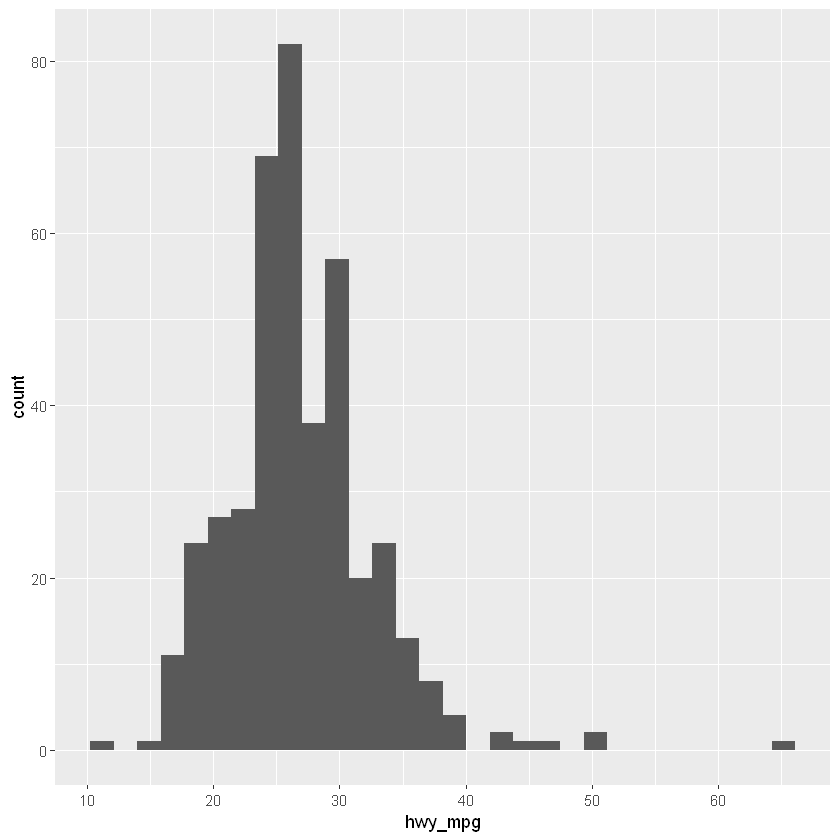

In [11]:
# Distribution of hwy_mpg
ggplot(cars, aes(x = hwy_mpg)) +
geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."

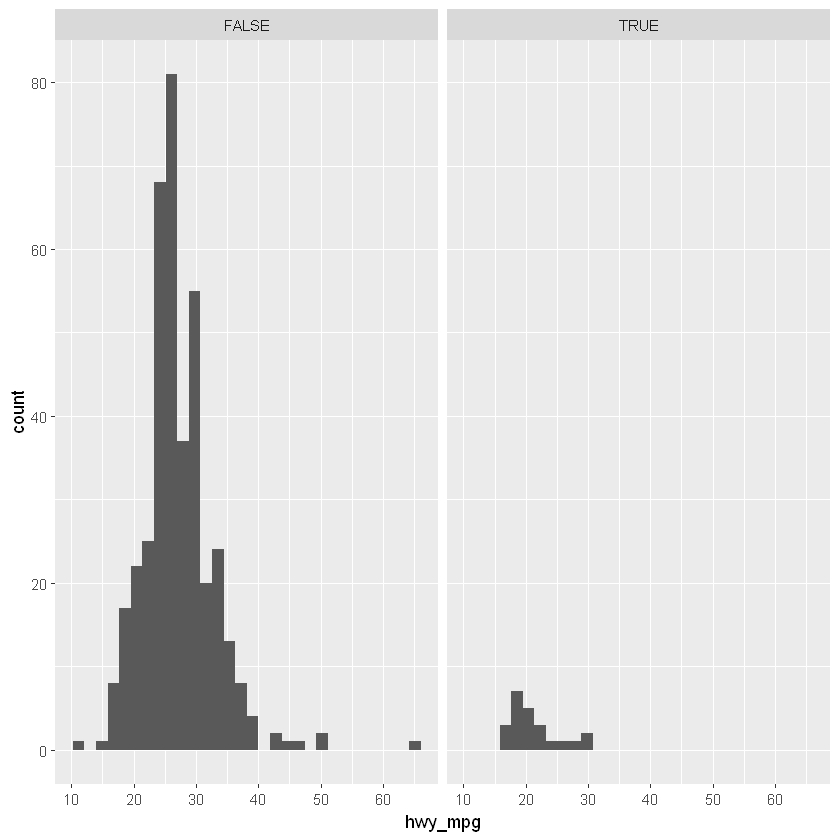

In [12]:
# Distributions and conditionals: hwy_mpg that are pickup
ggplot(cars, aes(x = hwy_mpg)) +
geom_histogram() +
facet_wrap(~pickup)

**Distribution for specific conditions**
- cars where eng_size < 2.0
- Cars with small engines

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


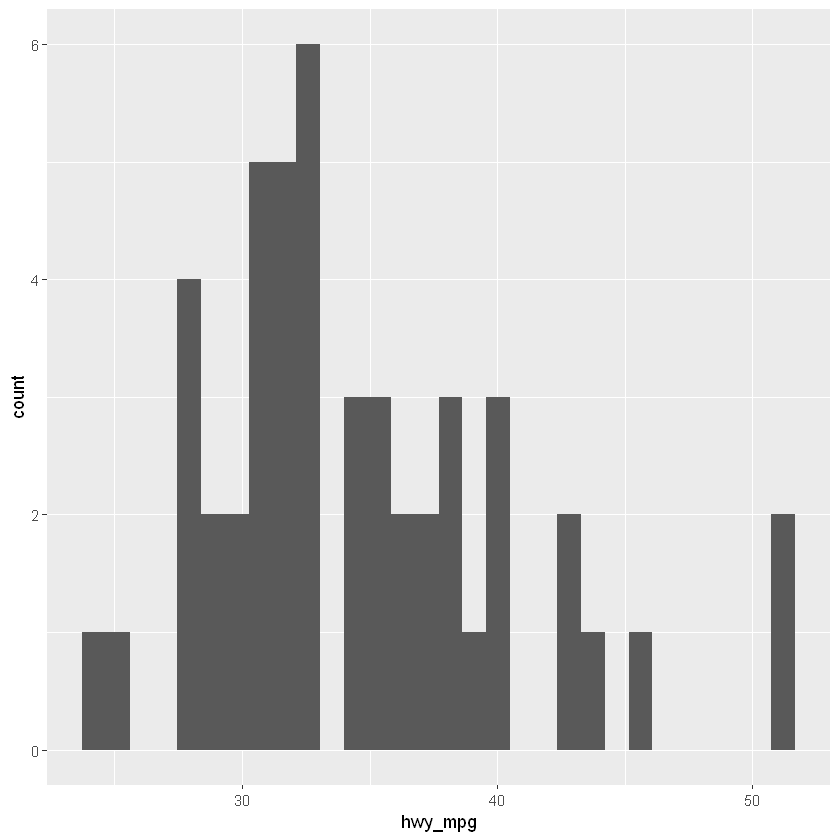

In [13]:
# Filter for the condition of interest
# Building a data pipeline
cars2 <- cars %>%
    filter(eng_size < 2.0)

ggplot(cars2, aes(x = hwy_mpg)) +
geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


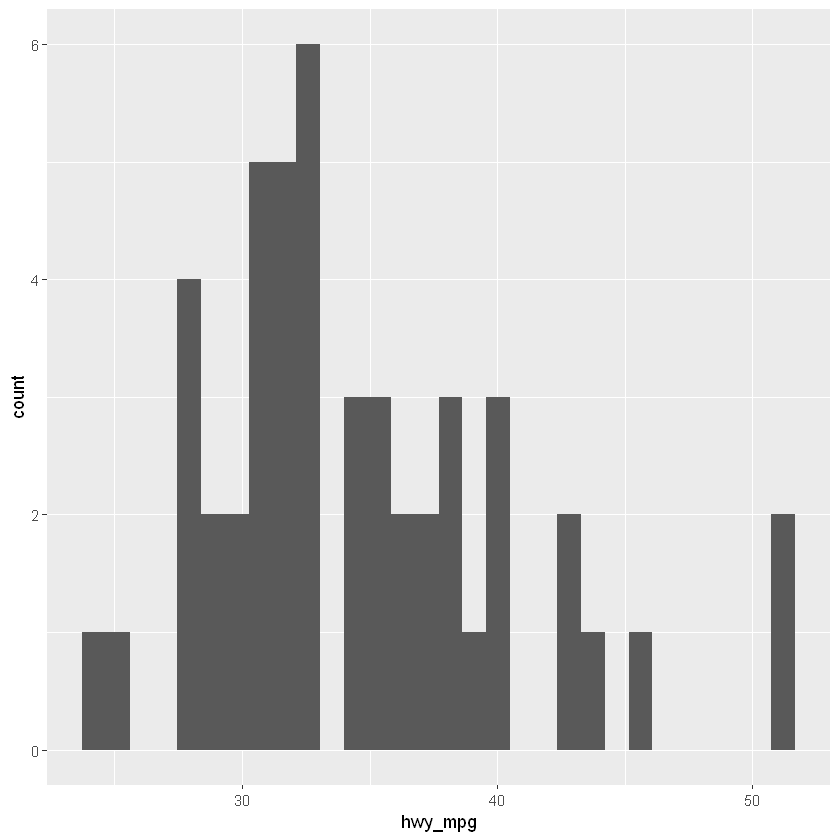

In [14]:
# Alternatively built as a continuos pipeline
cars %>%
    filter(eng_size < 2.0) %>%
    ggplot(aes(x = hwy_mpg)) +
    geom_histogram()

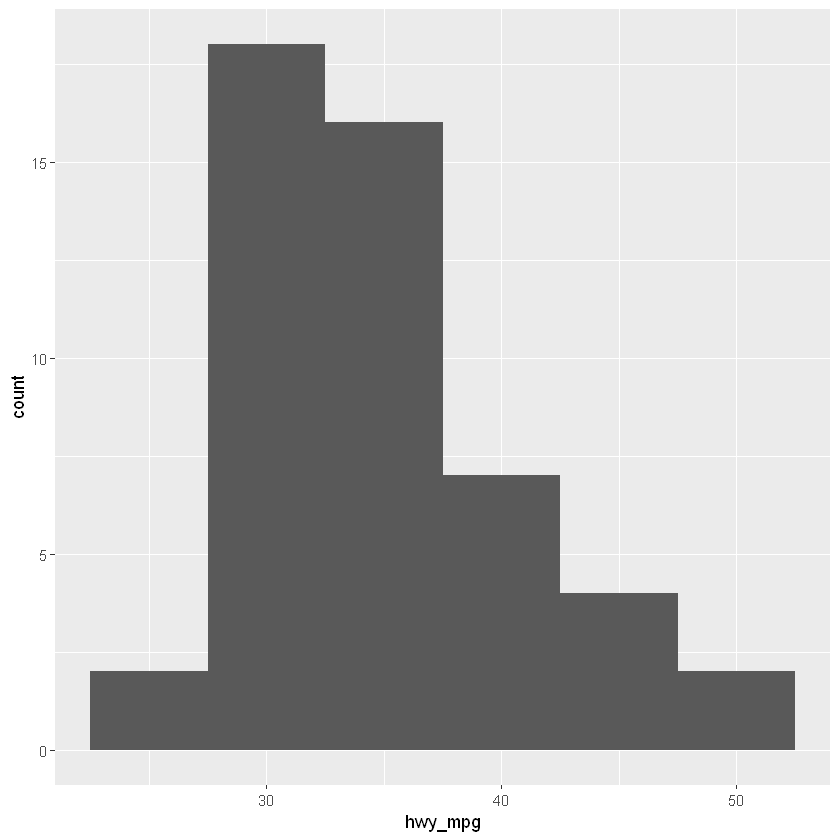

In [15]:
# Adjust the bin width to change the shape of the chart
cars %>%
    filter(eng_size < 2.0) %>%
    ggplot(aes(x = hwy_mpg)) +
    geom_histogram(binwidth = 5)

**Using density plots**

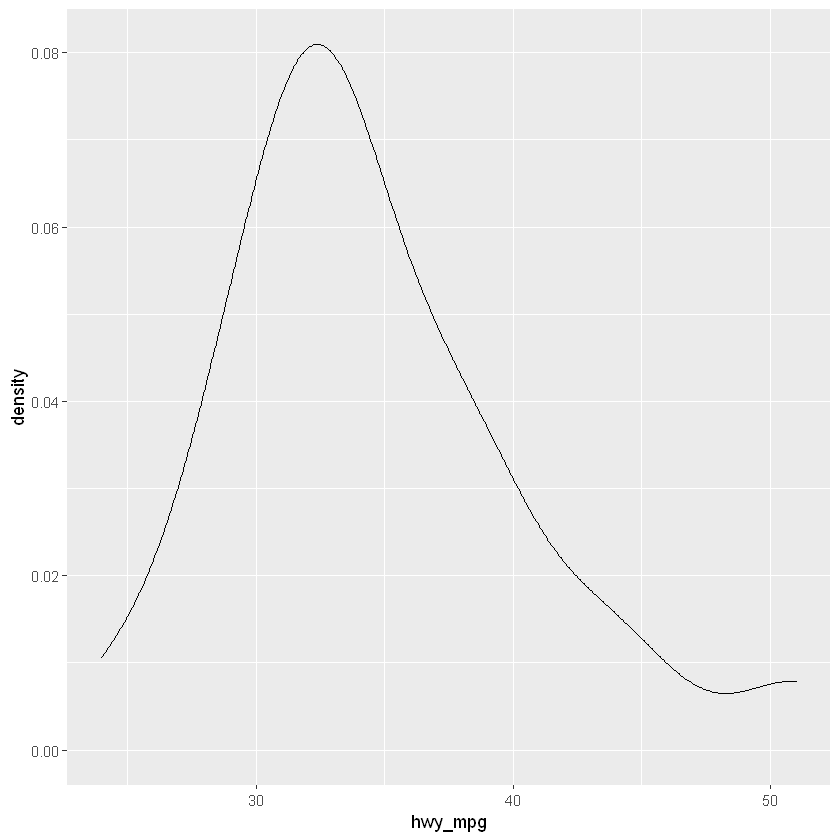

In [16]:
# Explore using density plots
cars %>%
    filter(eng_size < 2.0) %>%
    ggplot(aes(x = hwy_mpg)) +
    geom_density()

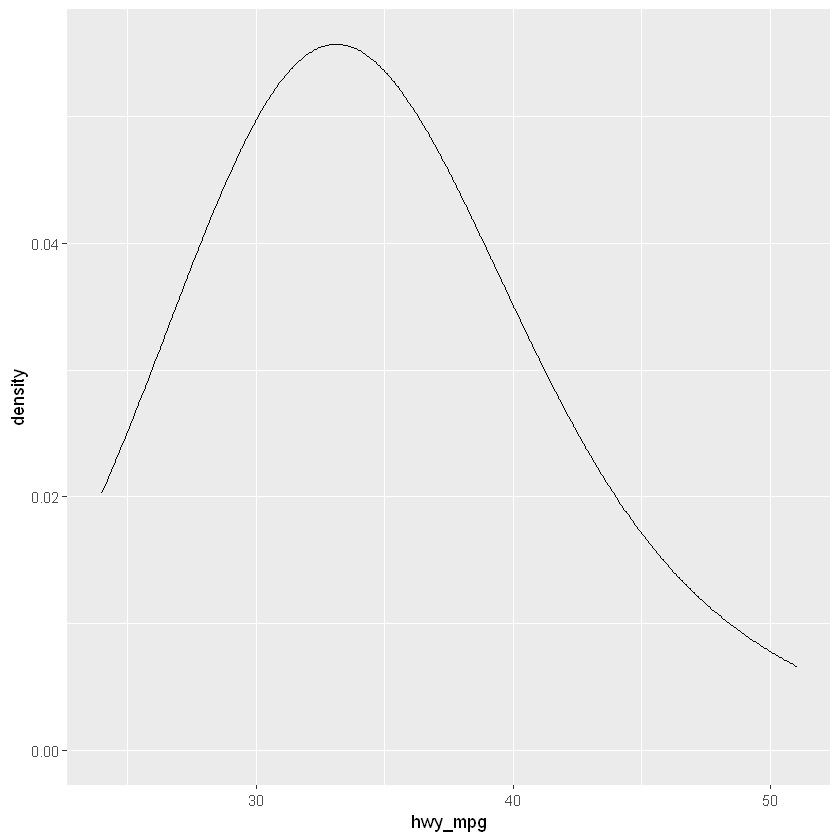

In [17]:
# Density plots with adjusted bins
cars %>%
    filter(eng_size < 2.0) %>%
    ggplot(aes(x = hwy_mpg)) +
    geom_density(bw = 5)

**Marginal and Conditional histograms**
- Get a sense of the marginal distribution of `horsepwr` and then compare it to the distribution of horsepower conditional on the price of the car being less than `$25,000`

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

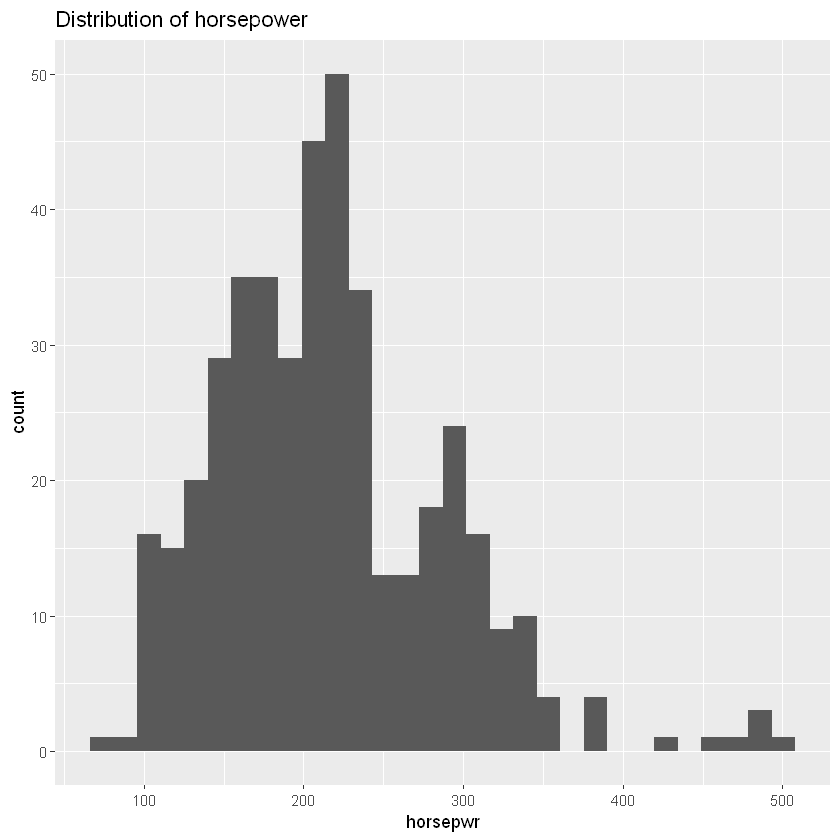

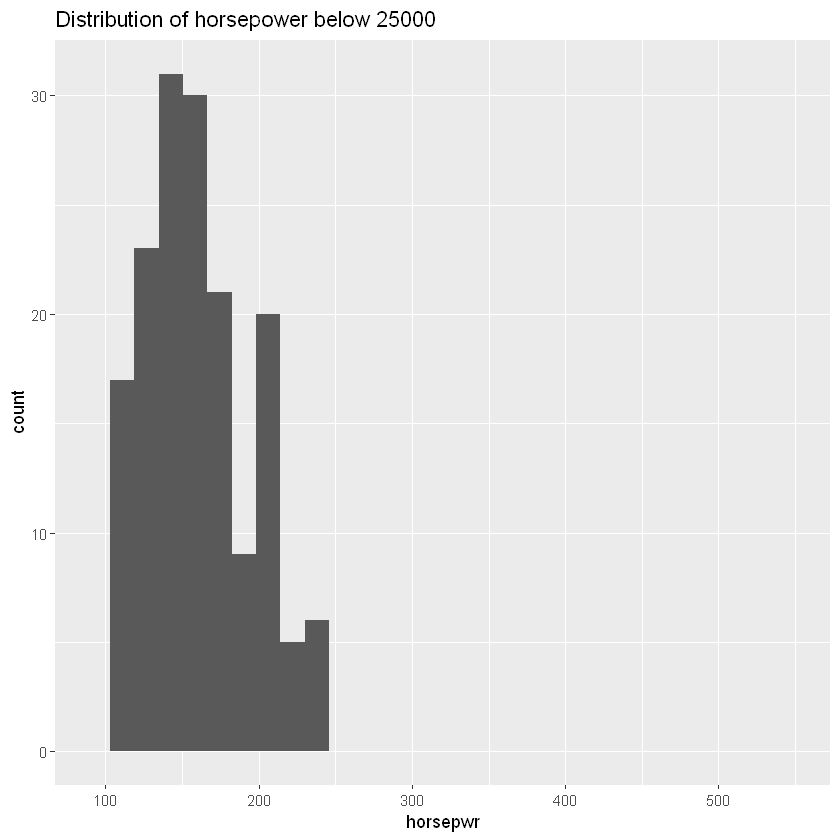

In [18]:
# Create hist of horsepwr
cars %>%
  ggplot(aes(x = horsepwr)) +
  geom_histogram() +
  ggtitle("Distribution of horsepower")

# Create hist of horsepwr for affordable cars
cars %>% 
  filter(msrp < 25000) %>%
  ggplot(aes(x = horsepwr)) +
  geom_histogram() +
  xlim(c(90, 550)) +
  ggtitle("Distribution of horsepower below 25000")

The highest horsepower car in the less expensive range has just under 250 horsepower.

**Comparisons of 3 different bandwith**

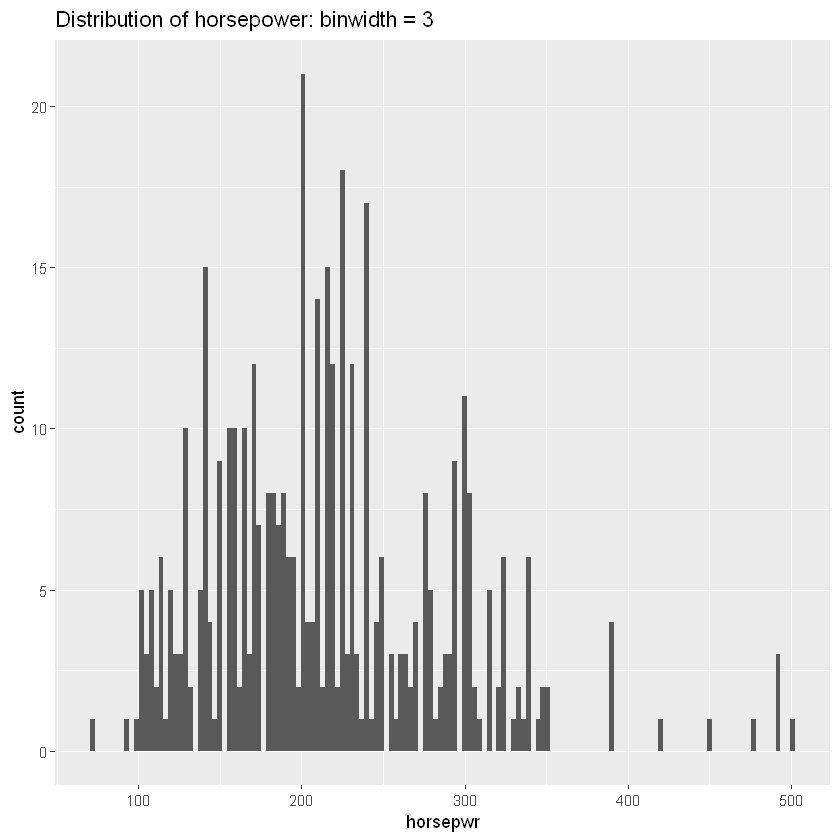

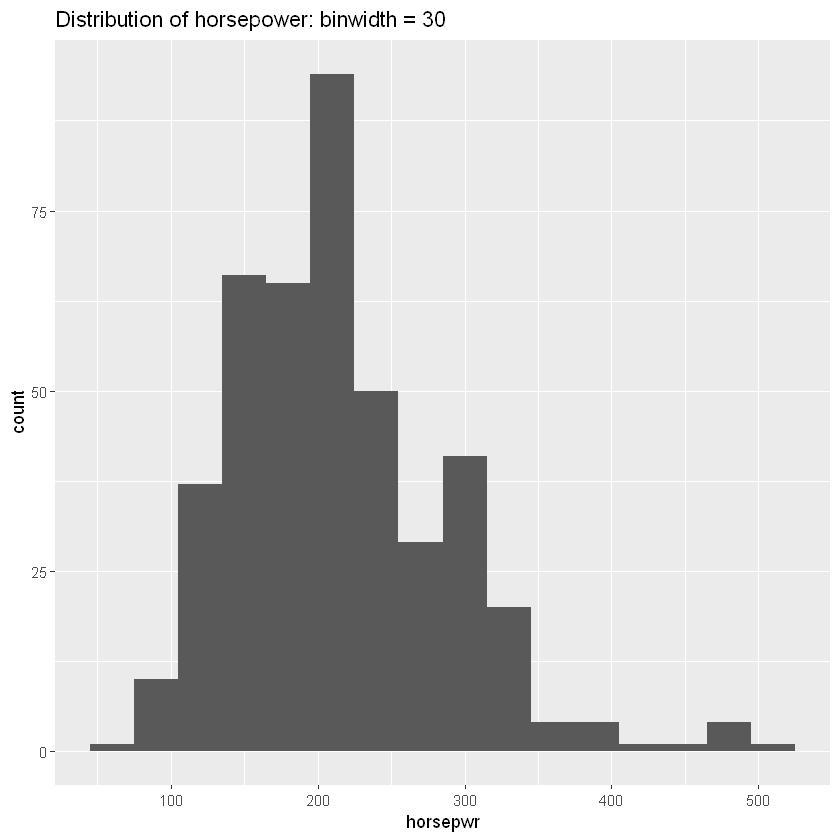

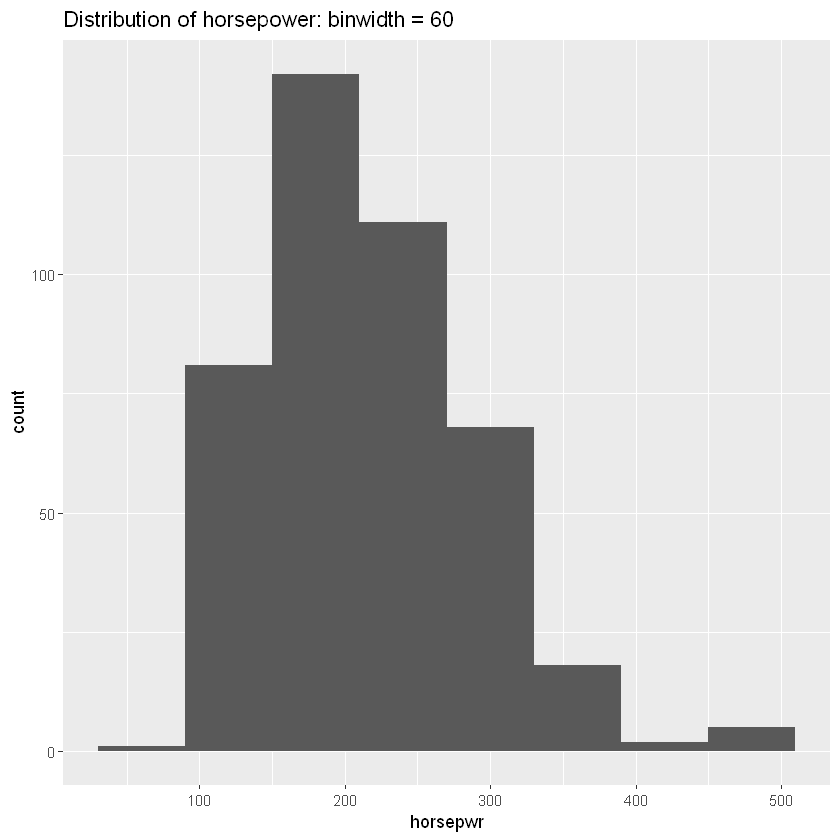

In [19]:
# Create hist of horsepwr with binwidth of 3
cars %>%
  ggplot(aes(x = horsepwr)) +
  geom_histogram(binwidth = 3) +
  ggtitle("Distribution of horsepower: binwidth = 3")

# Create hist of horsepwr with binwidth of 30
cars %>%
  ggplot(aes(x = horsepwr)) +
  geom_histogram(binwidth = 30) +
  ggtitle("Distribution of horsepower: binwidth = 30")

# Create hist of horsepwr with binwidth of 60
cars %>%
  ggplot(aes(x = horsepwr)) +
  geom_histogram(binwidth = 60) +
  ggtitle("Distribution of horsepower: binwidth = 60")


### Box Plot

**Side-by-side Box Plot**

Warning message:
"Removed 11 rows containing non-finite values (stat_boxplot)."

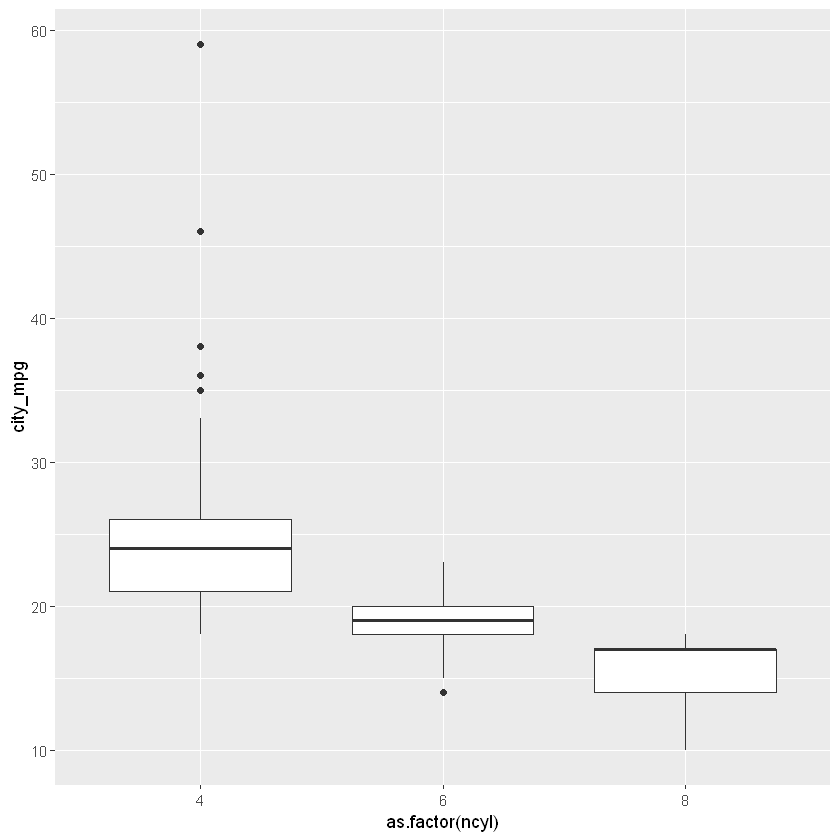

In [20]:
ggplot(common_cyl, aes(x = as.factor(ncyl), y = city_mpg)) +
geom_boxplot()

**Box plot with filters**

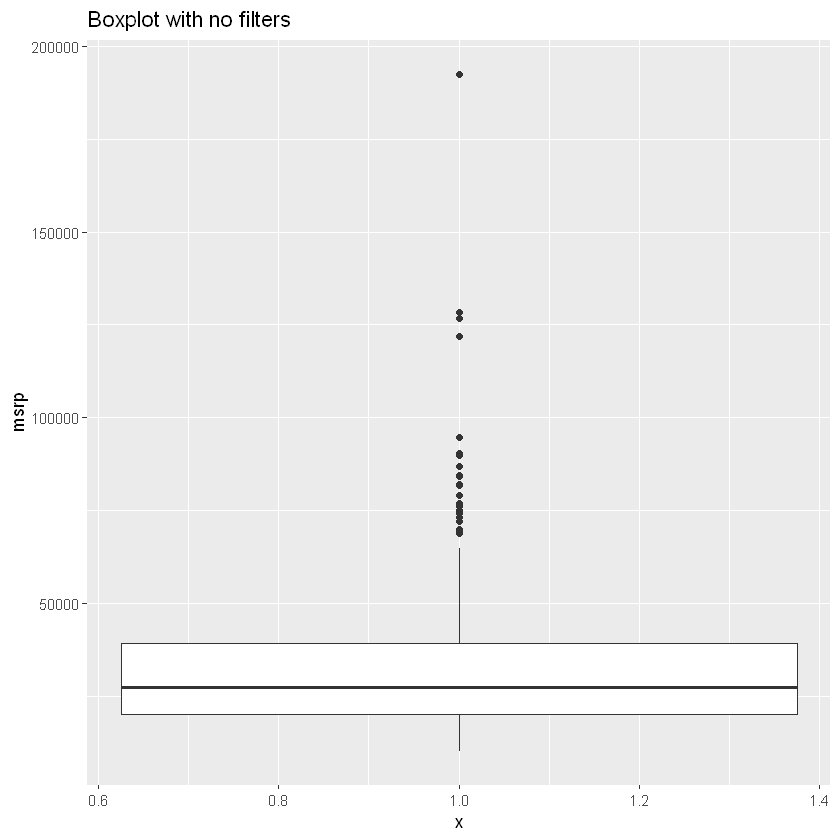

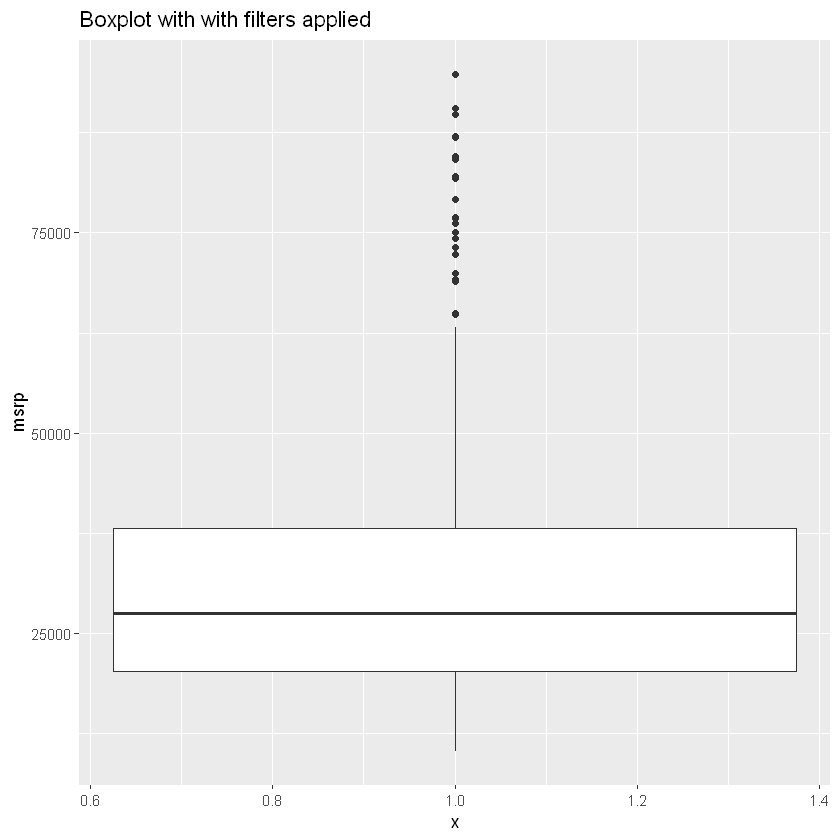

In [21]:
# Construct box plot of msrp
cars %>%
  ggplot(aes(x = 1, y = msrp)) +
  geom_boxplot() +
  ggtitle("Boxplot with no filters")

# Exclude outliers from data
cars_no_out <- cars %>%
  filter(msrp < 100000)

# Construct box plot of msrp using the reduced dataset
cars_no_out %>%
  ggplot(aes(x = 1, y = msrp)) +
  geom_boxplot() +
  ggtitle("Boxplot with with filters applied")

Warning message:
"Removed 14 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 14 rows containing non-finite values (stat_density)."

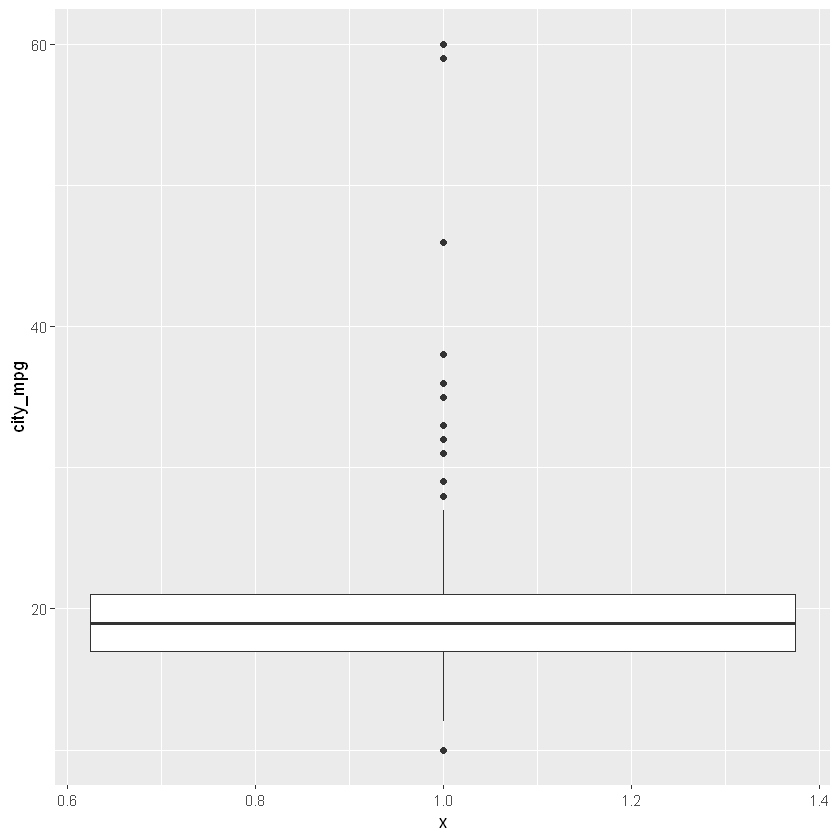

Warning message:
"Removed 28 rows containing non-finite values (stat_boxplot)."

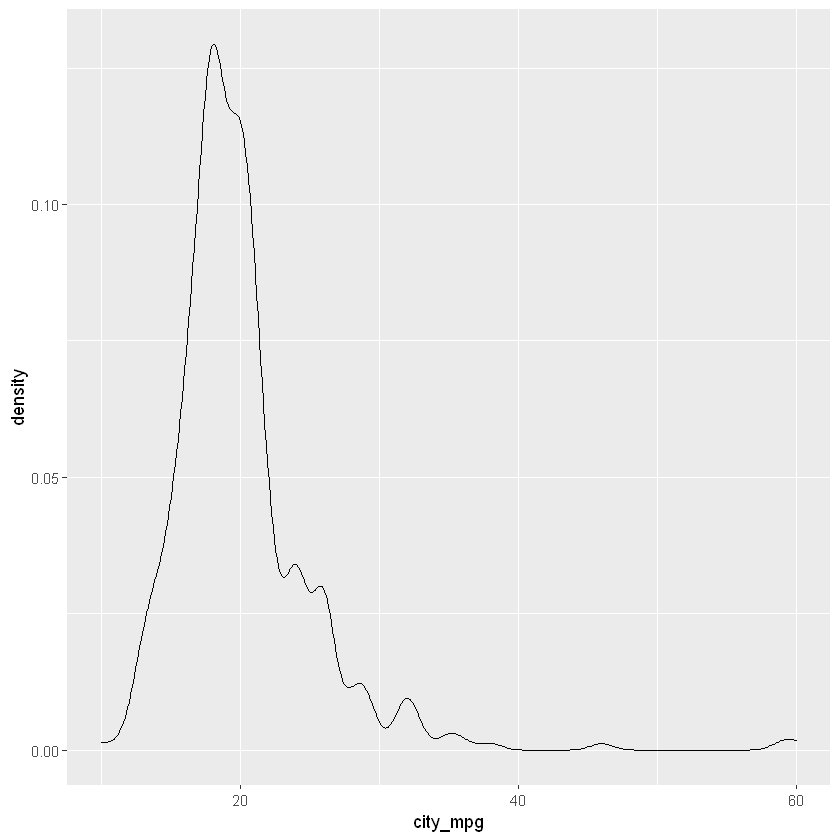

Warning message:
"Removed 28 rows containing non-finite values (stat_density)."

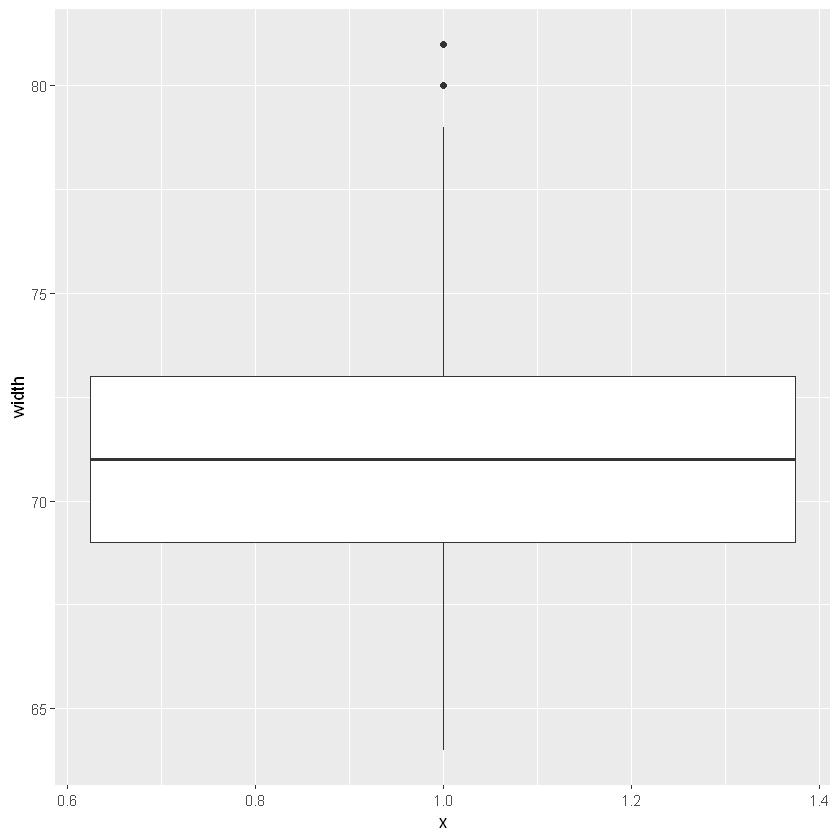

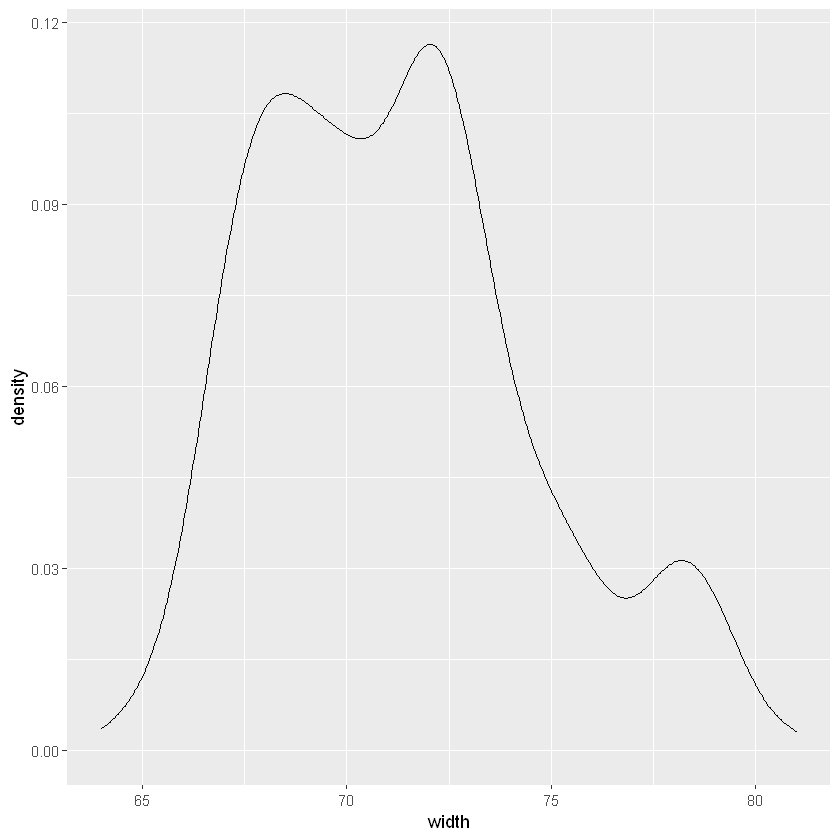

In [22]:
# Create plot of city_mpg
cars %>%
  ggplot(aes(x = 1, y = city_mpg)) +
  geom_boxplot()

# Create plot of width
cars %>% 
  ggplot(aes(x=city_mpg)) +
  geom_density()


# Create plot of city_mpg
cars %>%
  ggplot(aes(x = 1, y = width)) +
  geom_boxplot()


# Create plot of width
cars %>% 
  ggplot(aes(x=width)) +
  geom_density()

### Visualizing in Higher Dimensions

**Using facet Grid**

       
        FALSE TRUE
  FALSE   306   12
  TRUE     98   12

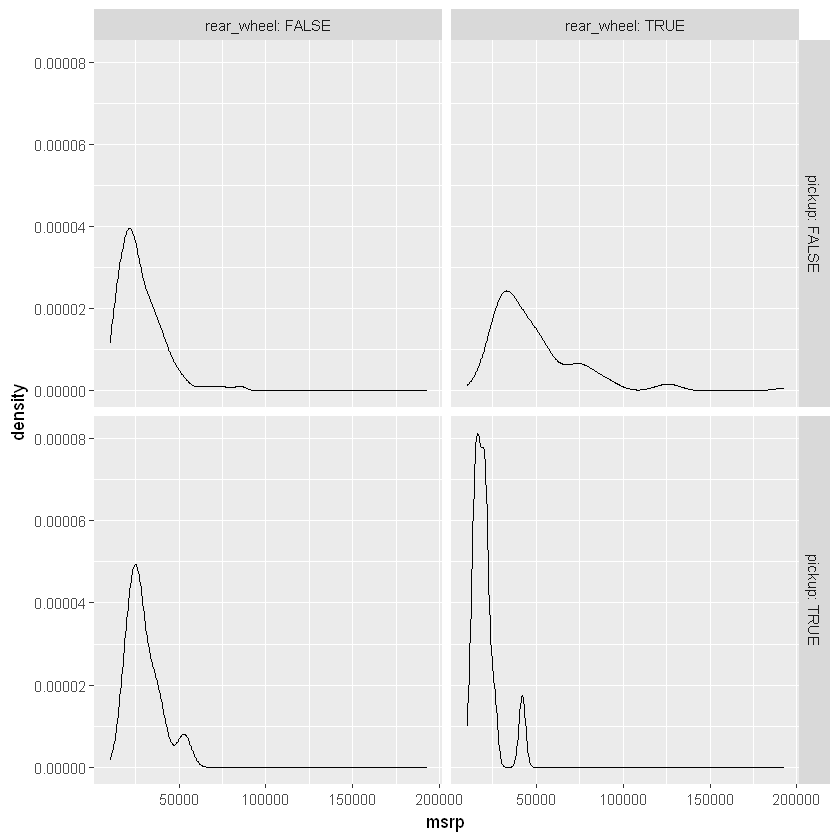

In [27]:
# Facet 'msrp' using levels of 'pickup' and 'rear_wheel'
# msrp vs pickup(yes) and rear_wheel(yes)
# msrp vs pickup(yes) and rear_wheel(no)
# msrp vs pickup(no) and rear_wheel(yes)
# msrp vs pickup(no) and rear_wheel(no)

# A combination of the 4 plots via facets
ggplot(cars, aes(x = msrp)) +
geom_density() +
facet_grid(pickup ~ rear_wheel, labeller = label_both)

# Number of cases that goes into each of these 4 plots
table(cars$rear_wheel, cars$pickup)

**Using Histograms**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 11 rows containing non-finite values (stat_bin)."

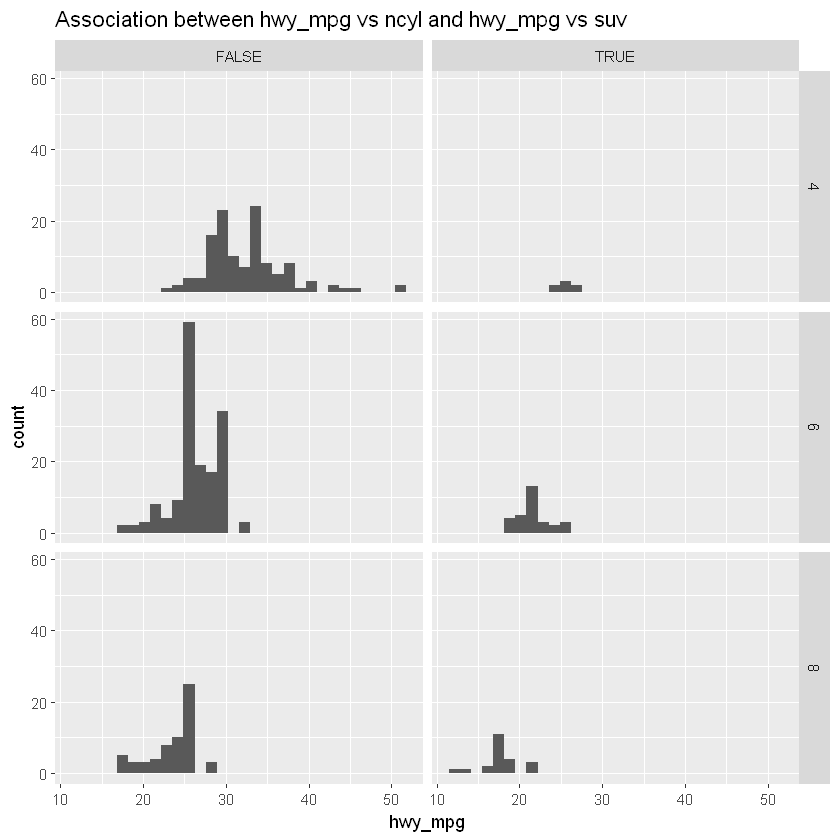

In [28]:
# Facet 'hists' using 'hwy mileage' and 'ncyl'
common_cyl %>%
  ggplot(aes(x = hwy_mpg)) +
  geom_histogram() +
  facet_grid(ncyl ~ suv) +
  ggtitle("Association between hwy_mpg vs ncyl and hwy_mpg vs suv")

We can say across both SUVs and non-SUVs, mileage tends to decrease as the number of cylinders increases.

# Numerical Summaries

**Common Distributions**

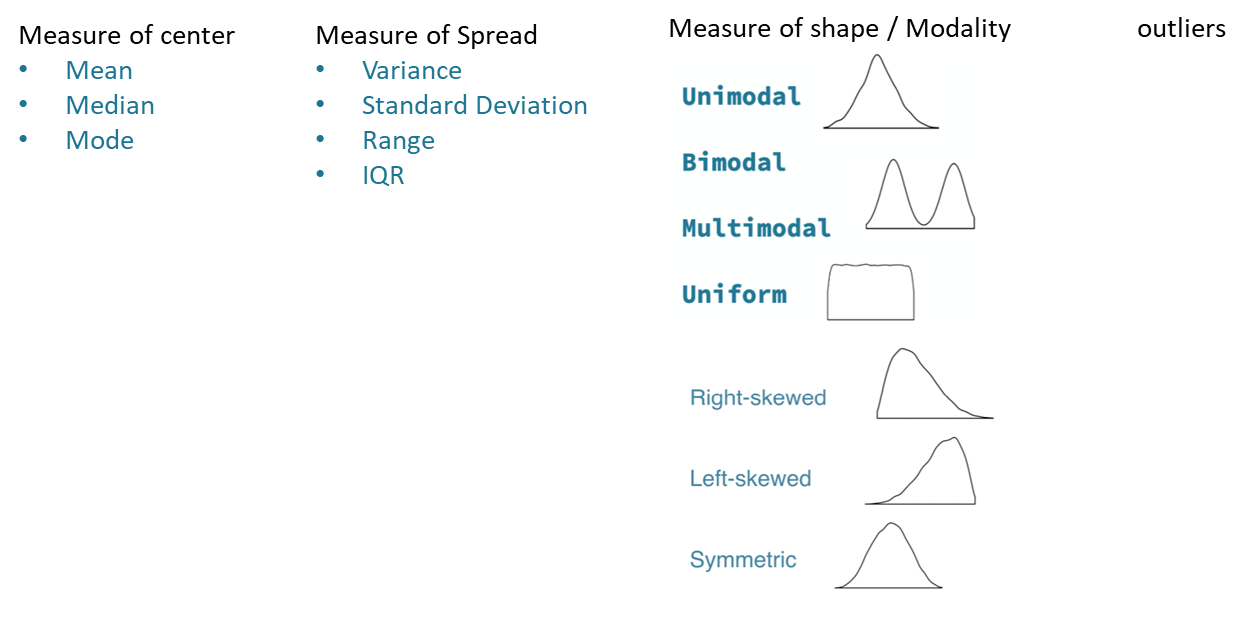

## Measure of Center

In [23]:
# Using the first 11 counts
# What is a typical value for these set of 11 numbers
x <- head(round(life$lifeExp), 11)
x

[1] 29 30 32 34 36 38 40 41 42 42 42

**Center: Mean**

In [24]:
# Finding a typical value for these set of 11 numbers
sum(x)/11

# Typical answer is the mean
mean(x)

[1] 36.90909

[1] 36.90909

**Center: Median**

In [25]:
# Another measure of center is the median
# Middle value in a sorted dataset
sort(x)
median(x)

[1] 29 30 32 34 36 38 40 41 42 42 42

[1] 38

**Center: Mode**

In [27]:
# A third measure of center is the mode
# The most common observation in the dataset
table(x)

x
29 30 32 34 36 38 40 41 42 
 1  1  1  1  1  1  1  1  3 

When working with skewed data, the median is often the appropriate measure of center

### Average Life expectancy: Grouped and Ungrouped

In [29]:
# Preview the gapminder dataset
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [30]:
# Create dataset of 2007 data
gap2007 <- filter(gapminder, year==2007)
head(gap2007)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,2007,43.828,31889923,974.5803
Albania,Europe,2007,76.423,3600523,5937.0295
Algeria,Africa,2007,72.301,33333216,6223.3675
Angola,Africa,2007,42.731,12420476,4797.2313
Argentina,Americas,2007,75.320,40301927,12779.3796
Australia,Oceania,2007,81.235,20434176,34435.3674


**Computing ungrouped mean**

In [33]:
# Compute mean and median lifeExp without grouping
gap2007 %>%
  summarize(mean(lifeExp), median(lifeExp))

mean(lifeExp),median(lifeExp)
67.00742,71.9355


**Computing grouped Mean**

In [31]:
# Compute groupwise mean and median lifeExp with groups by continent
gap2007 %>%
  group_by(continent) %>%
  summarize(mean(lifeExp), median(lifeExp))

continent,mean(lifeExp),median(lifeExp)
Africa,54.80604,52.9265
Americas,73.60812,72.8990
Asia,70.72848,72.3960
Europe,77.64860,78.6085
Oceania,80.71950,80.7195


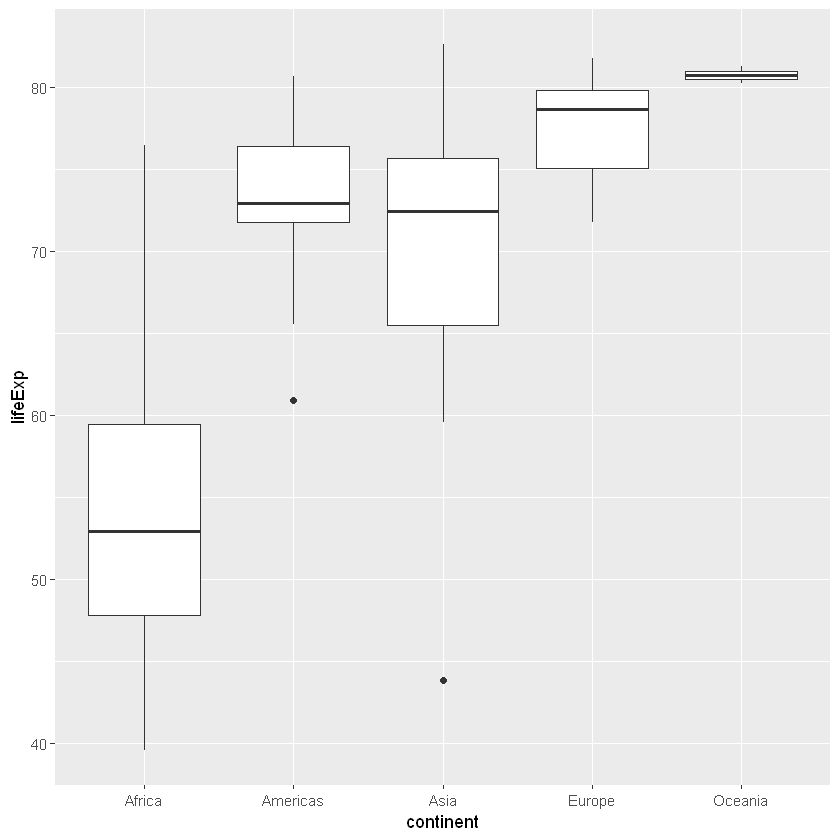

In [32]:
# Generate box plots of lifeExp for each continent
gap2007 %>%
  ggplot(aes(x = continent, y = lifeExp)) +
  geom_boxplot()

## Measure of spread: Variability

### From basic principles: Summarizing the variability we see in a dataset
- How the observations differs from the center (mean)

In [50]:
# The observations
x

# Computing for the mean
mean(x)

[1] 29 30 32 34 36 38 40 41 42 42 42

[1] 36.90909

In [35]:
# Distance from the mean
x - mean(x)

[1] -7.9090909 -6.9090909 -4.9090909 -2.9090909 -0.9090909  1.0909091
 [7]  3.0909091  4.0909091  5.0909091  5.0909091  5.0909091

In [36]:
# We need a single measure of variability
# Sum the differences
sum(x - mean(x))

[1] 0.00000000000002842171

In [51]:
# Squared the differences to get rid of the negatives
sum((x - mean(x))^2)

[1] 248.9091

In [38]:
# Dividing through by n
n <- 11
sum((x - mean(x))^2)/n

[1] 22.6281

In [39]:
# obtaining the Sample variance from first principle
# Useful measure for the spread of  distribution
sum((x - mean(x))^2)/(n - 1)

[1] 24.89091

**Variance**

In [40]:
# obtaining the sample variance programmatically
# Variance is in squared units 
# 24.891 squared years
var(x)

[1] 24.89091

**Standard Deviation**

In [52]:
# sample standard deviation
# Standard deviation is in the same unit as that of the data
# Standard deviation of the expected life is 4.9891 years
sd(x) 

[1] 4.989079

In [45]:
# Obtaining summary statistics of our data
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.00   33.00   38.00   36.91   41.50   42.00 

In [68]:
# Interquartile range
# 3rd qua - 1st qua
IQR(x) 

[1] 8.5

In [47]:
# Range
# Max value - min value
diff(range(x)) 

[1] 13

**Using different set of values where there is a huge number**

In [61]:
# Original data
x

# New set of data
x_new = c(29,55,32,34,36,38,40,41,42,42,42)
x_new

[1] 29 30 32 34 36 38 40 41 42 42 42

[1] 29 55 32 34 36 38 40 41 42 42 42

In [62]:
# Computing for the mean
mean(x_new) # Was 36.9090909090909

[1] 39.18182

In [63]:
# sample standard deviation
sd(x_new) # Was 4.98907898222799

[1] 6.867579

In [64]:
# Variance is in squared units 
var(x_new) # Was 24.8909090909091

[1] 47.16364

In [67]:
# Obtaining summary statistics of our data
summary(x_new)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.00   35.00   40.00   39.18   42.00   55.00 

In [65]:
# Computing for the IQR
IQR(x_new) 

[1] 7

In [66]:
# Computing for the range
diff(range(x_new)) # Was 13

[1] 26

### Computing measures of spread from the gapminder data

**Computing without groups**

In [71]:
# Compute groupwise measures of spread
gap2007 %>%
  summarize(sd(lifeExp),
            IQR(lifeExp),
            n())

sd(lifeExp),IQR(lifeExp),n()
12.07302,19.253,142


**Computing group wise**

In [70]:
# Compute groupwise measures of spread
gap2007 %>%
  group_by(continent) %>%
  summarize(sd(lifeExp),
            IQR(lifeExp),
            n())

continent,sd(lifeExp),IQR(lifeExp),n()
Africa,9.6307807,11.61025,52
Americas,4.4409476,4.63200,25
Asia,7.9637245,10.15200,33
Europe,2.9798127,4.78250,30
Oceania,0.7290271,0.51550,2


continent,sd(lifeExp),IQR(lifeExp),n()
Africa,9.6307807,11.61025,52
Americas,4.4409476,4.63200,25
Asia,7.9637245,10.15200,33
Europe,2.9798127,4.78250,30
Oceania,0.7290271,0.51550,2


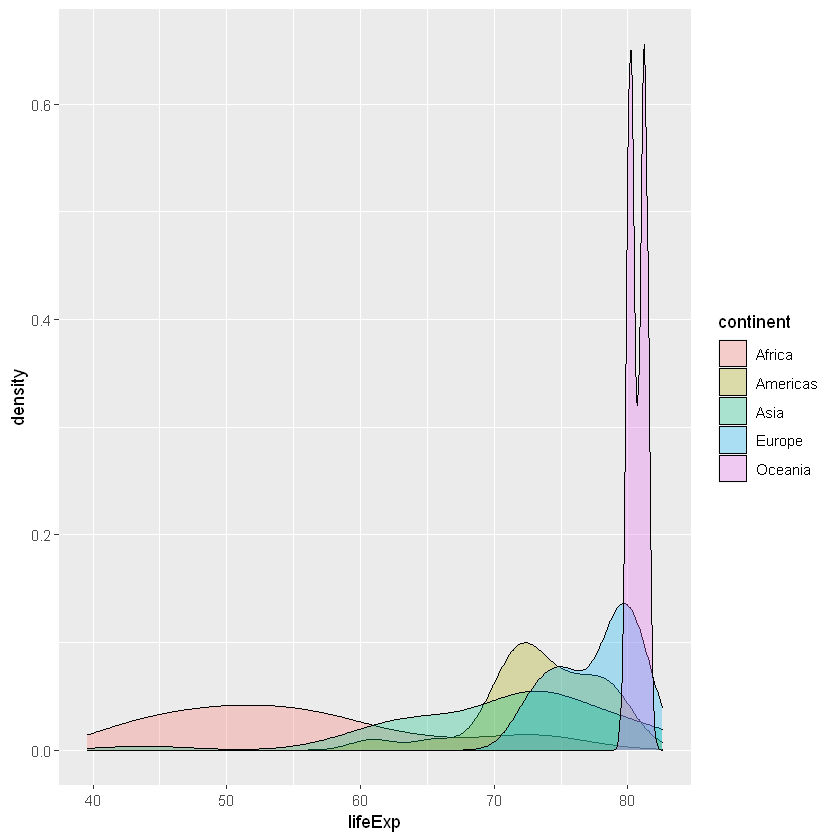

In [69]:
# Generate overlaid density plots
gap2007 %>%
  ggplot(aes(x = lifeExp, fill = continent)) +
  geom_density(alpha = 0.3)

**Computing an appropriate measure of center and spread**

In [72]:
# Compute stats for lifeExp in Americas
gap2007 %>%
  filter(continent == 'Americas' ) %>%
  summarize(mean(lifeExp),
            sd(lifeExp))

mean(lifeExp),sd(lifeExp)
73.60812,4.440948


In [73]:
# Compute stats for population
gap2007 %>%
  summarize(median(pop),
            IQR(pop))

median(pop),IQR(pop)
10517531,26702008


## Measures of Modality: Shape and transformation

**Shape of the income dataset**

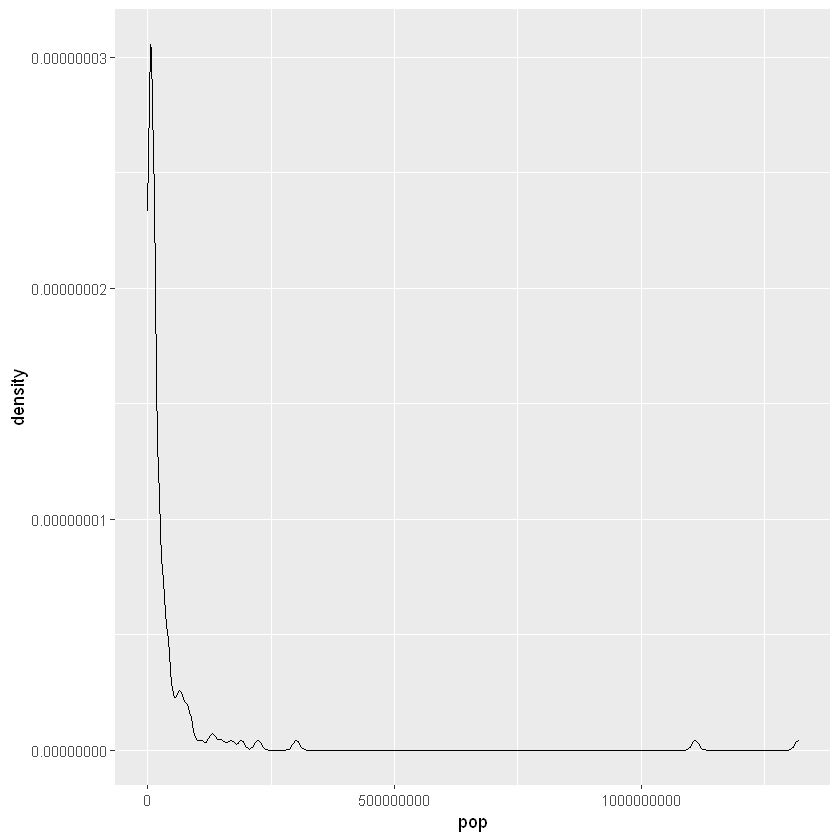

In [75]:
# Create density plot of old variable
gap2007 %>%
  ggplot(aes(x = pop)) +
  geom_density()

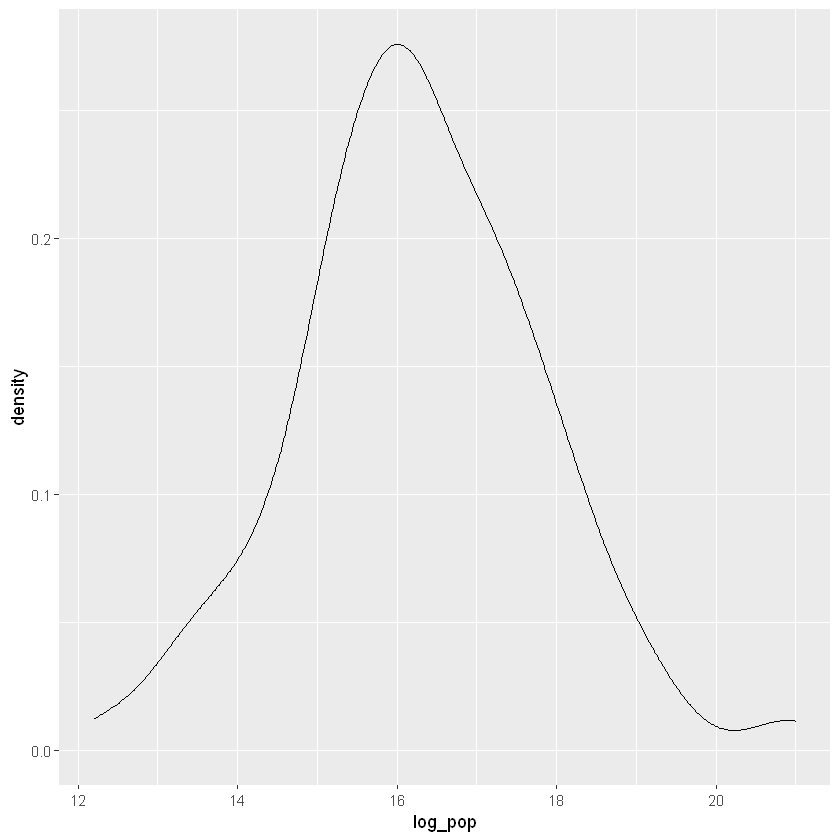

In [76]:
# Transform the skewed pop variable
gap2007 <- gap2007 %>%
  mutate(log_pop = log(pop))

# Create density plot of new variable
gap2007 %>%
  ggplot(aes(x = log_pop)) +
  geom_density()

## Handling Outliers
- It is helpful to consider outliers separate from the rest of the data

**Define outliers and add a column to the data to identify outliers**

In [81]:
# Filter for Asia, add column indicating whether or not outliers
gap_asia <- gap2007 %>%
  filter(continent == 'Asia') %>%
  mutate(is_outlier = lifeExp<50)

head(gap_asia)

country,continent,year,lifeExp,pop,gdpPercap,log_pop,is_outlier
Afghanistan,Asia,2007,43.828,31889923,974.5803,17.27780,TRUE
Bahrain,Asia,2007,75.635,708573,29796.0483,13.47101,FALSE
Bangladesh,Asia,2007,64.062,150448339,1391.2538,18.82913,FALSE
Cambodia,Asia,2007,59.723,14131858,1713.7787,16.46394,FALSE
China,Asia,2007,72.961,1318683096,4959.1149,20.99990,FALSE
"Hong Kong, China",Asia,2007,82.208,6980412,39724.9787,15.75862,FALSE


**Create a plot without the outliers**

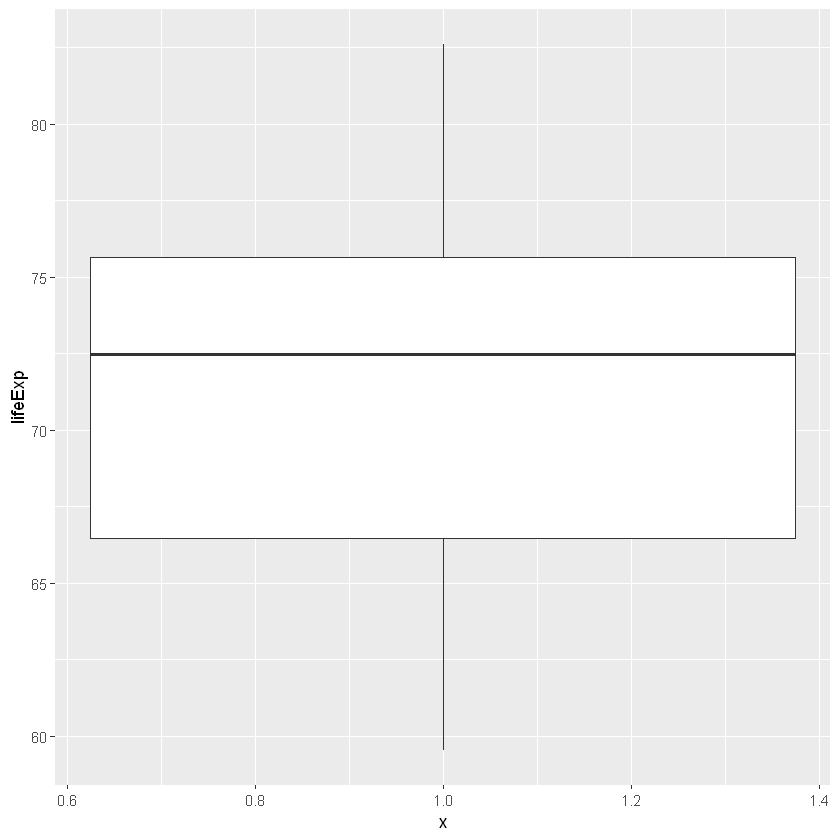

In [82]:
# Remove outliers, create box plot of lifeExp
gap_asia %>%
  filter(!is_outlier) %>%
  ggplot(aes(x = 1, y = lifeExp)) +
  geom_boxplot()